# Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('flight_ticket.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

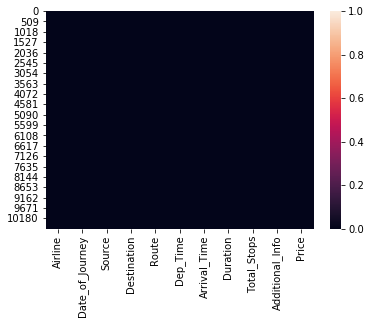

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
#handling missing data and all three features are categorical in nature so using fillna method with most frequent.
df['Route'].fillna(df['Route'].mode()[0], inplace = True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace = True)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']

 ['Price']


In [9]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  1
No of categorical features:  10


In [10]:
for col in cf:
    print(df[col].value_counts()) 

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


In [11]:
df['Price'] = df['Price'].astype(float)

# Statistics Summary

In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
df.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2377,233,423,550,5626,8345


In [14]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897.0
1,1,6,3,0,84,31,906,336,1,8,7662.0
2,4,43,2,1,118,70,413,106,1,8,13882.0
3,3,10,3,0,91,164,1324,311,0,8,6218.0
4,3,0,0,5,29,149,1237,303,0,8,13302.0


# Data visualisation

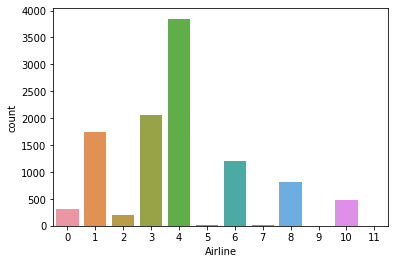

In [16]:
#univarite analysis
sns.countplot(df['Airline'])
plt.show()

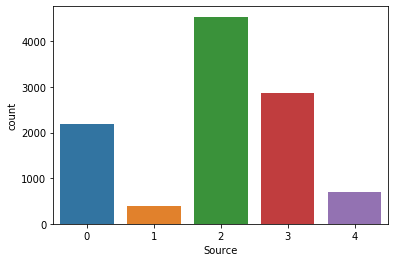

In [17]:
sns.countplot(df['Source'])
plt.show()

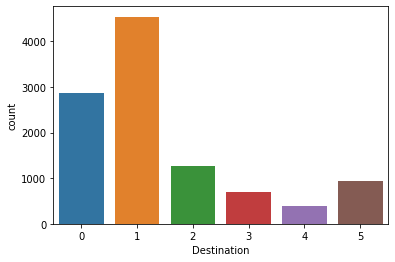

In [18]:
sns.countplot(df['Destination'])
plt.show()

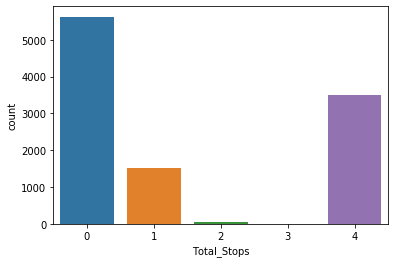

In [19]:
sns.countplot(df['Total_Stops'])
plt.show()

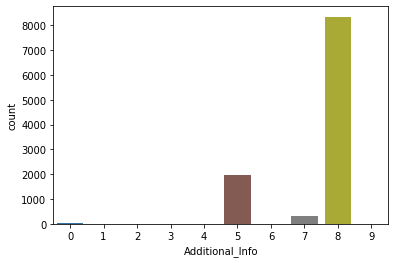

In [20]:
sns.countplot(df['Additional_Info'])
plt.show()

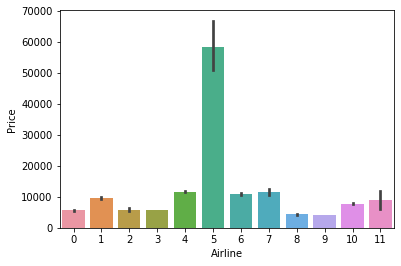

In [21]:
#bivariate analysis
sns.barplot(x='Airline',y='Price',data=df) 
plt.show()

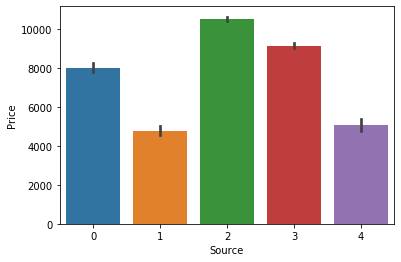

In [22]:
sns.barplot(x='Source',y='Price',data=df) 
plt.show()

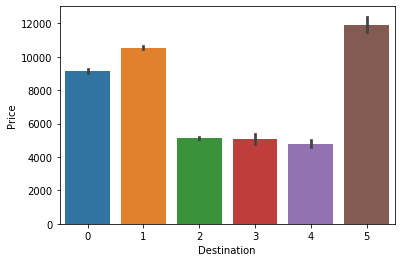

In [23]:
sns.barplot(x='Destination',y='Price',data=df) 
plt.show()

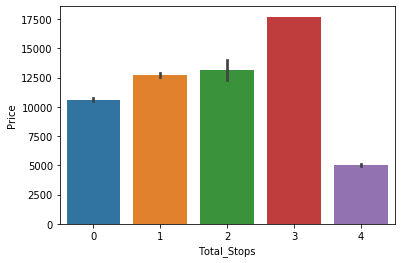

In [24]:
sns.barplot(x='Total_Stops',y='Price',data=df) 
plt.show()

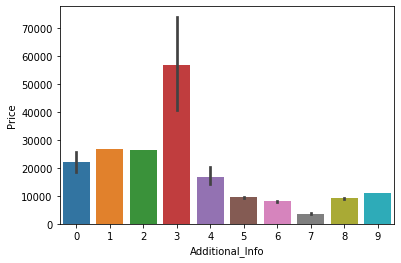

In [25]:
sns.barplot(x='Additional_Info',y='Price',data=df) 
plt.show()

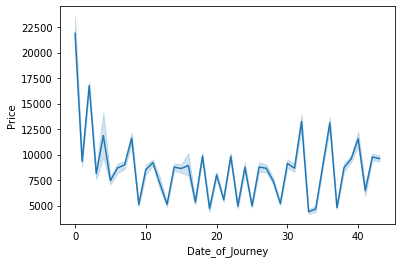

In [26]:
sns.lineplot(x='Date_of_Journey',y='Price',data=df) 
plt.show()

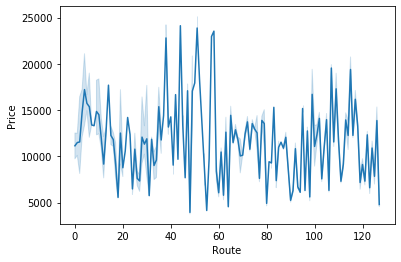

In [27]:
sns.lineplot(x='Route',y='Price',data=df) 
plt.show()

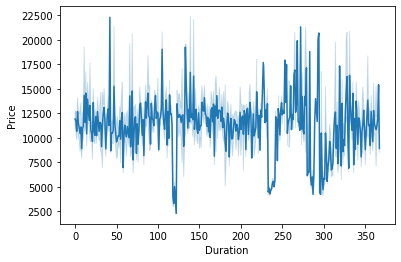

In [28]:
sns.lineplot(x='Duration',y='Price',data=df) 
plt.show()

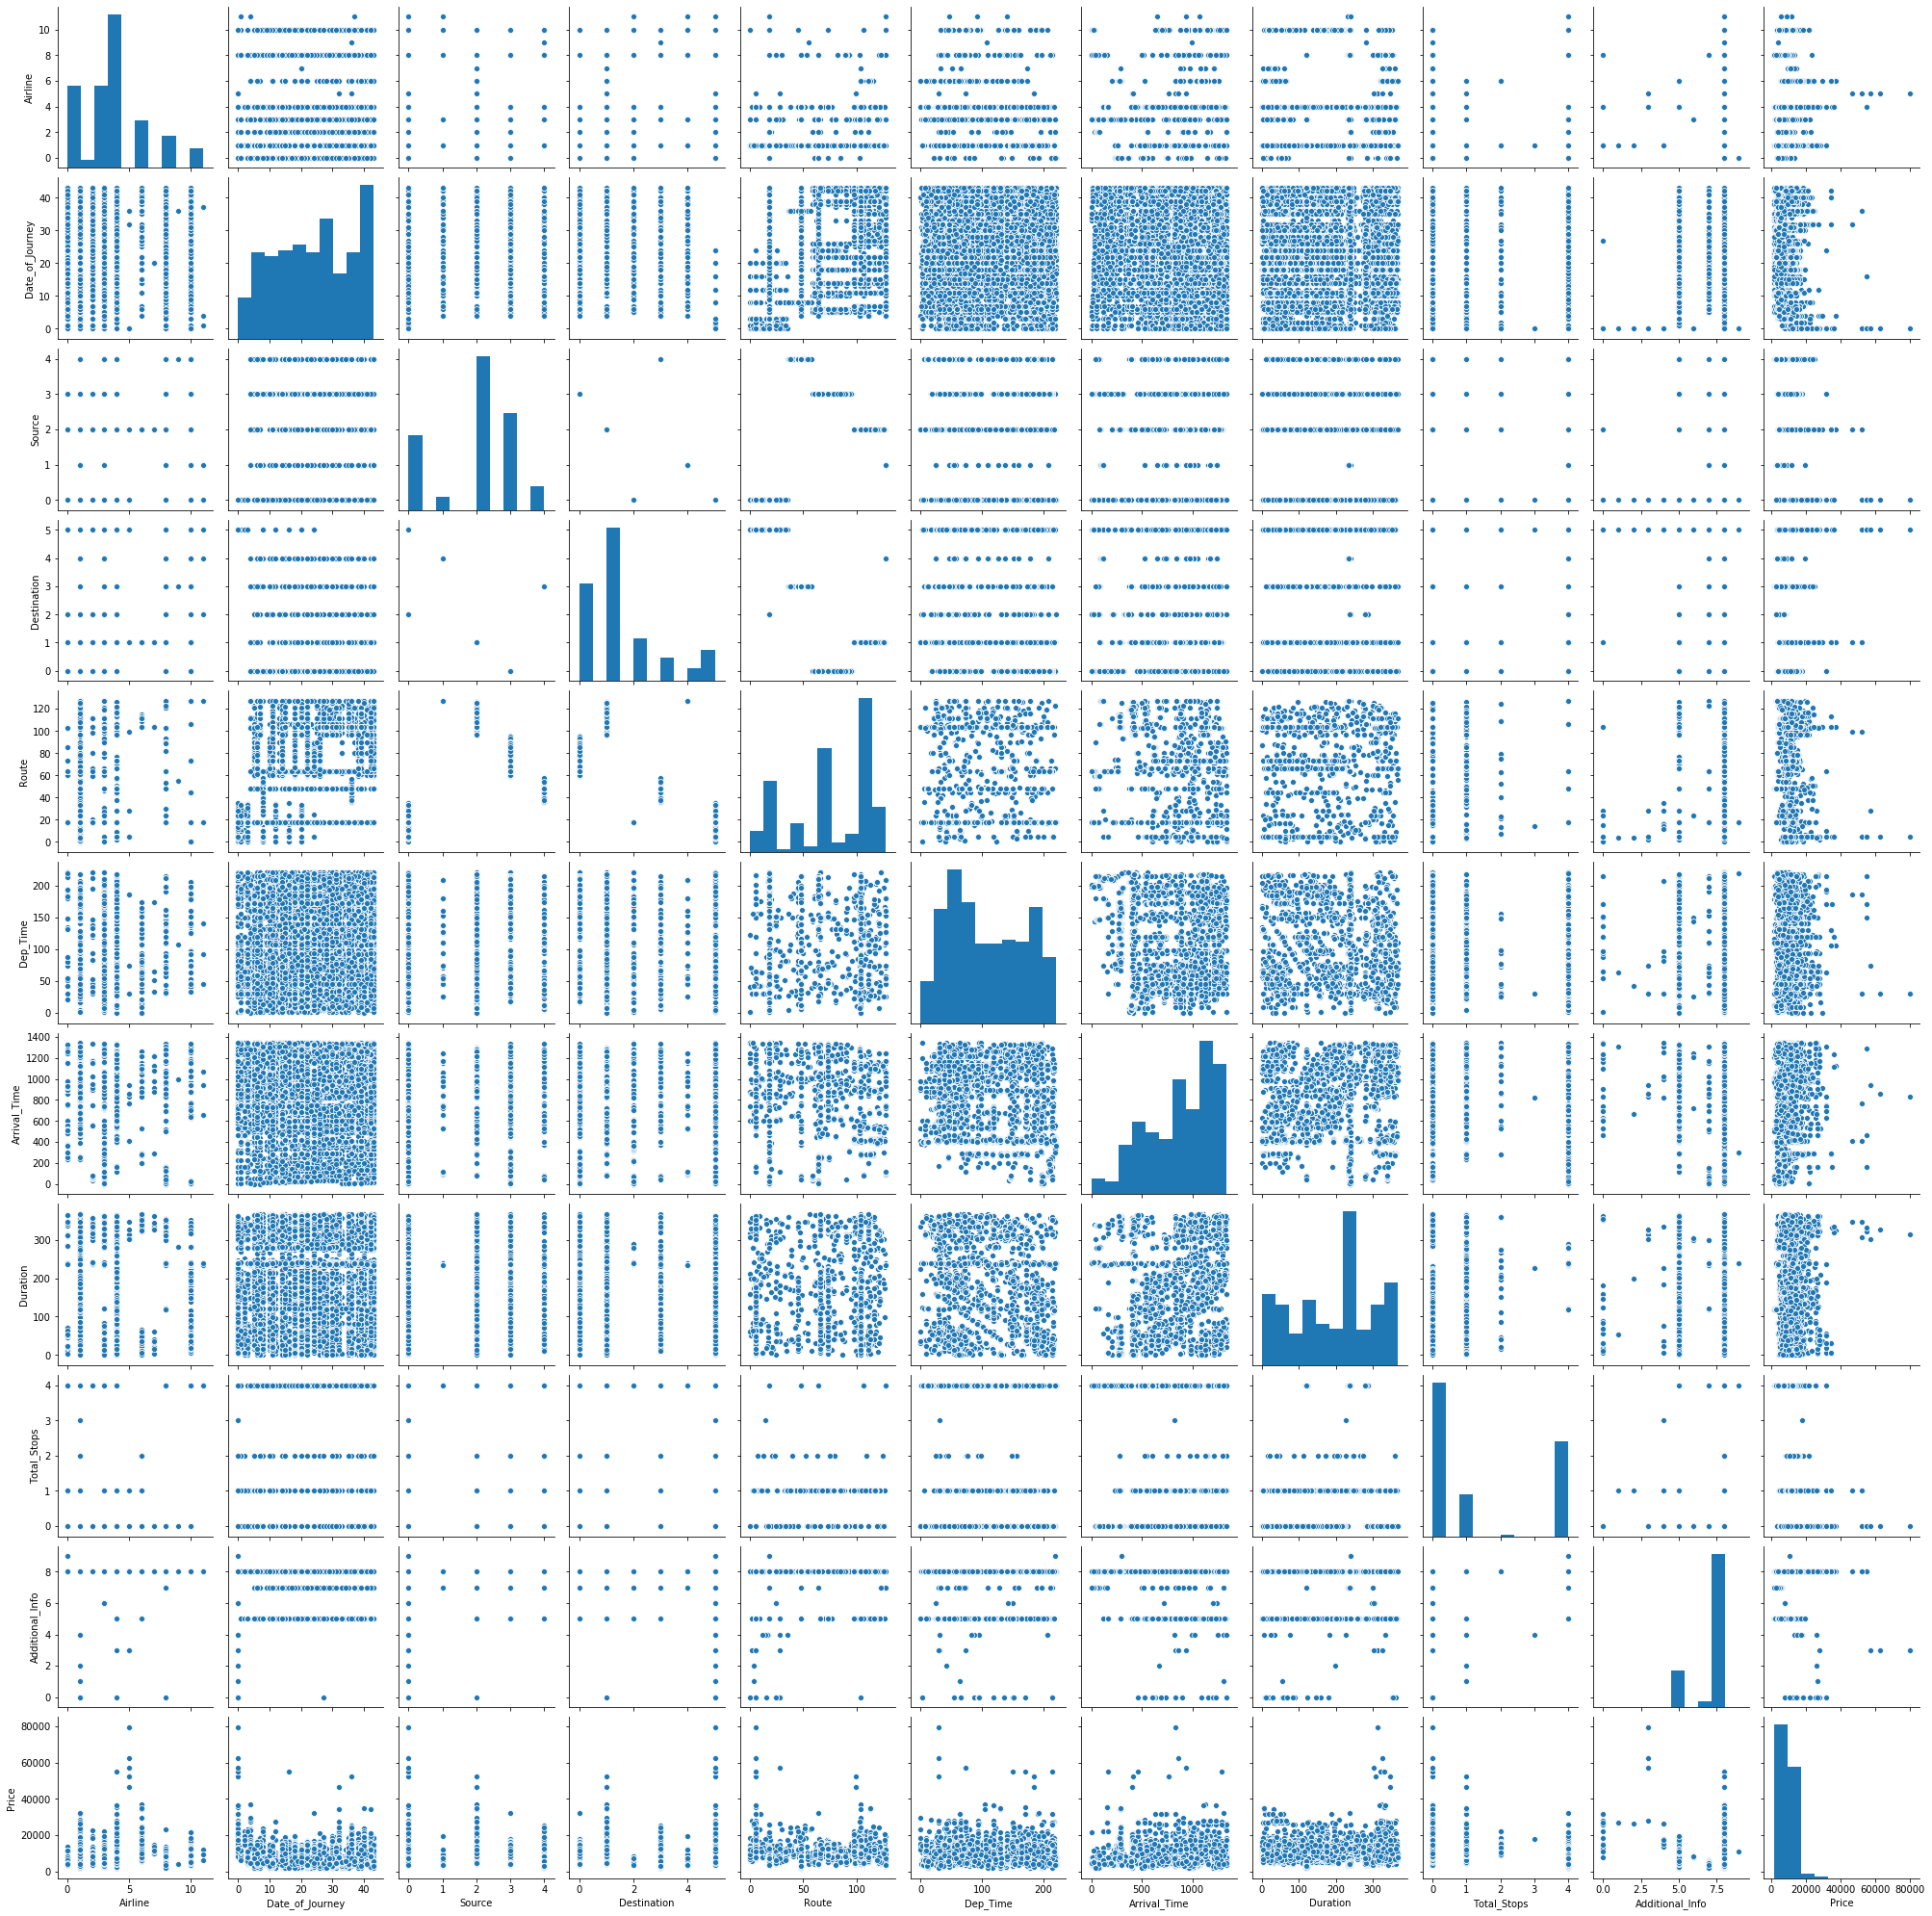

In [29]:
sns.pairplot(data=df) 
plt.show()

In [30]:
#correlation matrix
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


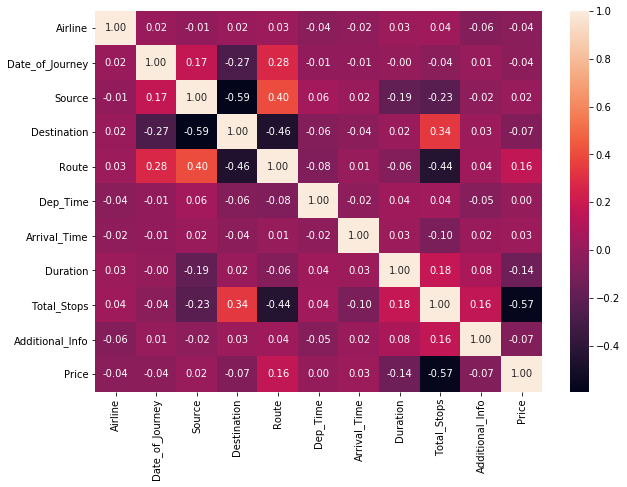

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

<Figure size 1440x1080 with 0 Axes>

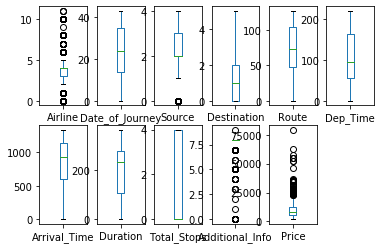

In [32]:
plt.figure(figsize=(20,15))
df.plot(kind='box',subplots=True,layout=(2,6)) 
plt.show()

In [33]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(10683, 11)
(10578, 11)


In [34]:
y=df["Price"]
dfx=df.drop(columns=['Price'], axis=1)
y.unique()

array([ 3897.,  7662., 13882., ...,  9790., 12352., 12648.])

In [35]:
dfx.skew()

Airline            0.731709
Date_of_Journey   -0.061918
Source            -0.439204
Destination        1.269454
Route             -0.511368
Dep_Time           0.194141
Arrival_Time      -0.608273
Duration          -0.216095
Total_Stops        0.618208
Additional_Info   -1.533587
dtype: float64

In [36]:
# handling skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
d=pt.fit_transform(dfx)
d=pd.DataFrame(d,columns=dfx.columns)
dfx=d
dfx.skew()

Airline           -0.015590
Date_of_Journey   -0.214275
Source            -0.234422
Destination        0.040863
Route             -0.437329
Dep_Time          -0.150696
Arrival_Time      -0.382489
Duration          -0.391174
Total_Stops        0.317054
Additional_Info   -1.363711
dtype: float64

In [37]:
dfx.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,-0.294761,0.058692,-1.615250,1.778905,-1.554896,1.502971,-1.797168,0.459515,1.287329,0.524414
1,-1.418107,-1.519284,0.897016,-1.367088,0.214536,-1.355825,0.040704,1.242483,0.342269,0.524414
2,0.147495,1.488249,-0.027698,0.020394,1.203004,-0.512117,-1.385804,-0.749803,0.342269,0.524414
3,-0.294761,-1.133449,0.897016,-1.367088,0.414981,0.923119,1.488139,1.043222,-0.909965,0.524414
4,-0.294761,-2.208639,-1.615250,1.778905,-1.281577,0.723736,1.172207,0.978826,-0.909965,0.524414


In [38]:
x=dfx

# Prediction for Price

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [40]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(7087, 10) (3491, 10)
(7087,) (3491,)


In [41]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  86  is  0.32960883734409196


In [42]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 10, 'kernel': 'linear'}


In [43]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
5
uniform
{'n_neighbors': 5, 'weights': 'uniform'}


In [44]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
LAR=Lasso()
RR=Ridge()
DT=DecisionTreeRegressor(random_state=fr_state)
RFR=RandomForestRegressor(random_state=fr_state)
ABR=AdaBoostRegressor(random_state=fr_state)
GBR=GradientBoostingRegressor(random_state=fr_state)

In [45]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('LassoRegression', LAR))
models.append(('RidgeRegressor', RR))
models.append(('DecisionTreeRegressor', DT))
models.append(('RandomForestRegressor', RFR))
models.append(('AdaBoostRegressor', ABR))
models.append(('GradientBoostingRegressor',GBR))

In [46]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_log_error(y_test,y_pred))
    print("root Mean squared log error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


Cross_Val_Score =  0.7597797161016436


error:
r2 score is:  0.7523427767788874


root Mean squared log error:  0.22394355202980873


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  0.24267912429768587


error:
r2 score is:  0.25587188620232126


root Mean squared log error:  0.4023243631726293


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.30261858717974627


error:
r2 score is:  0.32960883734409196


root Mean squared log error:  0.39

In [47]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_log_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_log_error
0,KNeighborsRegressor,0.759780,0.752343,0.223944
1,SVR,0.242679,0.255872,0.402324
2,LinearRegression,0.302619,0.329609,0.392572
3,LassoRegression,0.302619,0.329511,0.392685
4,RidgeRegressor,0.302619,0.329602,0.392584
5,DecisionTreeRegressor,0.856280,0.849242,0.177286
6,RandomForestRegressor,0.906449,0.900194,0.146596
7,AdaBoostRegressor,0.568019,0.565924,0.350418
8,GradientBoostingRegressor,0.828680,0.833782,0.196047


# Saving the best model

In [48]:
from sklearn.externals import joblib

In [49]:
joblib.dump(RFR,'flightprice.pkl')

['flightprice.pkl']

In [50]:
model=joblib.load('flightprice.pkl')

In [51]:
model.predict(x_test.head())

array([ 4561.71333333,  4337.75      , 16571.1       , 10231.32      ,
       10359.51      ])